In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math

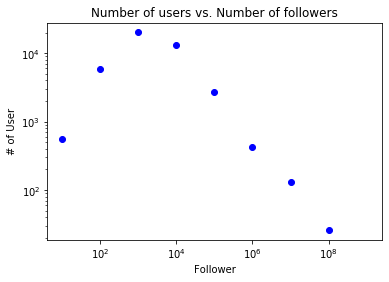

In [3]:
'''
Read data from the file and check the format about the data
'''
df = pd.read_csv('./CleanedTweetsInfo.csv')
'''
Modification on the data and separate them as Attribute and Target
'''
X = df.iloc[:, 5]     # User Id
# frequencies
Y = df.iloc[:, 9]     # Follower Number

x_ = [10**i for i in range(1,10)]
y_ = [0] * len(x_)
for val in Y:
    if val == 0:
        continue
    temp = int(math.log(val,10))
    y_[temp] += 1
plt.plot(x_,y_,"bo")
plt.title("Number of users vs. Number of followers")
plt.xlabel("Follower")
plt.ylabel("# of User")
plt.xscale("log")
plt.yscale("log")
plt.show()


In [47]:
Important = 7000
l = ['Tweet_time','FollowerCount','RetweetTime']
time = df.loc[:, df.columns.isin(l)]
t = list(time['Tweet_time'])
f_count = list(time['FollowerCount'])
r_count = list(time['RetweetTime'])
res = []
count1 = 0
count2 = 0
for index in range(len(t)):
    res.append((t[index],f_count[index],r_count[index]))
    if f_count[index] > Important:
        count1 += 1
    else:
        count2 += 1
    
print(len(res), count1, count2)

43324 4240 39084


In [62]:
popular_user = [0]* 92
unpopular_user = [0] * 92
for val in res:
    t = 0
    if val[0][4:7] == "Feb":
        t += 31 + int(val[0][8:10])
    elif val[0][4:7] == "Mar":
        t += 60 + int(val[0][8:10])
    else:
        t += int(val[0][8:10])
    if int(val[1]) > Important:
        popular_user[t] += 1
    else:
        unpopular_user[t] += 1
#print(important_user)
#print(unimportant_user)

#for loc,val in enumerate(unimportant_user):
#    print(loc,val)

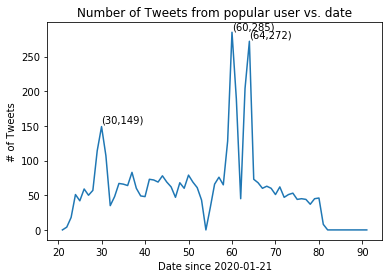

In [71]:
flg, ax = plt.subplots()
ax.plot([x for x in range(21,92)],popular_user[21:])
ax.annotate('(%i,%i)'%(30,149), xy=(30,149),xytext=(30,154))
ax.annotate('(%i,%i)'%(60,285), xy=(60,285),xytext=(60,289))
ax.annotate('(%i,%i)'%(64,272), xy=(64,272),xytext=(64,277))
plt.title("Number of Tweets from popular user vs. date")
plt.xlabel("Date since 2020-01-21")
plt.ylabel("# of Tweets")
plt.show()

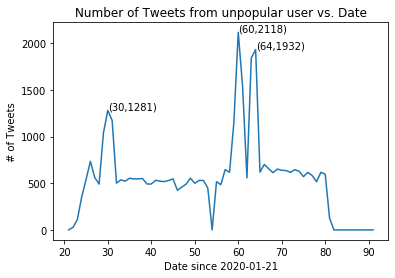

In [70]:
flg, ax = plt.subplots()
ax.plot([x for x in range(21,92)],unpopular_user[21:])
ax.annotate('(%i,%i)'%(30,1281), xy=(30,1281),xytext=(30,1284))
ax.annotate('(%i,%i)'%(60,2118), xy=(60,2118),xytext=(60,2123))
ax.annotate('(%i,%i)'%(64,1932), xy=(64,1932),xytext=(64,1937))
plt.title("Number of Tweets from unpopular user vs. Date")
plt.xlabel("Date since 2020-01-21")
plt.ylabel("# of Tweets")
plt.show()

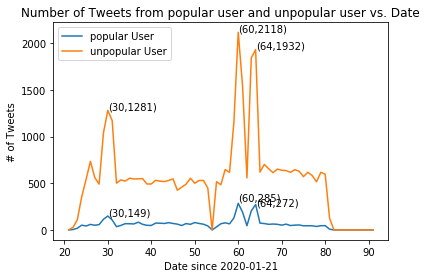

In [65]:
fig, ax = plt.subplots()
ax.plot([x for x in range(21,92)],popular_user[21:],label = "popular User")
ax.annotate('(%i,%i)'%(30,149), xy=(30,149),xytext=(30,154))
ax.annotate('(%i,%i)'%(60,285), xy=(60,285),xytext=(60,315))
ax.annotate('(%i,%i)'%(64,272), xy=(64,272),xytext=(64,255))
ax.plot([x for x in range(21,92)],unpopular_user[21:], label = "unpopular User")
ax.annotate('(%i,%i)'%(30,1281), xy=(30,1281),xytext=(30,1284))
ax.annotate('(%i,%i)'%(60,2118), xy=(60,2118),xytext=(60,2123))
ax.annotate('(%i,%i)'%(64,1932), xy=(64,1932),xytext=(64,1937))
ax.legend(loc = 'upper left')
plt.title("Number of Tweets from popular user and unpopular user vs. Date")
plt.xlabel("Date since 2020-01-21")
plt.ylabel("# of Tweets")
plt.show()
#Conclusion: The pattern of popular users is almost same as the unpopular users

In [66]:
temp = [val for val in res]

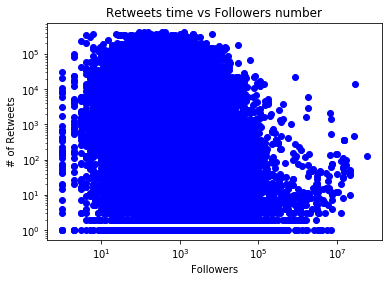

In [69]:
followers = []
retweets = []
for val in temp:
    followers.append(val[1])
    retweets.append(val[2])
plt.plot(followers,retweets,'bo')
plt.title("Retweets time vs Followers number")
plt.xlabel("Followers")
plt.ylabel("# of Retweets")
plt.xscale("log")
plt.yscale("log")
plt.show()
# Conclusion: The number of retweets shows that popular user dont have strong relation with spreading the awareness
# of the CoVID-19